# Práctica 2: Clasificación y evaluación de modelos
Duración: 1 sesión

Apartado 2.2: Métodos alternativos de clasificación

Objetivo: El objetivo de esta práctica es introducir el uso de otros métodos de clasificación estudiados en teoría

Realice los siguientes ejercicios usando el módulo scikit-learn de Python y cualquier otro módulo adicional que considere utilizando los mismo conjuntos de datos de la práctica 2:

1. Seleccione al menos tres conjuntos de datos de 2 classes. Es preferible conjuntos pequeños con variables
nominales.
2. Para cada uno de estos conjuntos aplique el método RIPPER del módulo “wittgenstein” (ejemplo en ripper.py).
Evalúe los modelos obtenidos y compárelos con un árbol de decisión. Trate de interpretar los modelos obtenidos.
3. Seleccione al menos 10 conjuntos de datos. Genere un clasificador SVM con un kernel lineal y un valor fijo de
C=1. Compare el rendimiento con un árbol de decisión.
4. Utilice el método GridSearchCV para obtener los mejores híper-parámetros usando los siguientes valores:
- Set the parameters by cross-validation

  parameters = [

  {"kernel": ["rbf"], "gamma": [0.01, 0.1, 1.0], "C": [1, 10, 100, 1000]},

  {"kernel": ["linear"], "C": [1, 10, 100, 1000]},

  ]

  Compare el rendimiento de los resultados usando validación cruzada de híper-parámetros y los métodos usando valores fijos.
5.  Seleccione un conjunto de datos con miles de atributos. Compare el rendimiento de un modelo SVM frente a un árbol de decisión. Realice una comparación adicional mediante el test de McNemar.

NOTAS:
* Los ejercicios marcados con un * son opcionales.

In [2]:
import time
!pip install scipy
!pip install -U scikit-learn
!pip install wittgenstein
!pip install sklearn-evaluation
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 67.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.6/110.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.3 MB/s eta 0:00:00


In [3]:
#Disable warning of Ripper implementation
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import sklearn
import wittgenstein as lw
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn import tree, svm
from sklearn_evaluation import plot
import seaborn as sns
import time

Deploy Panel apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


In [4]:
data = arff.loadarff('ionosphere.arff')
df_iono = pd.DataFrame(data[0])

data = arff.loadarff('diabetes.arff')
df_diabe = pd.DataFrame(data[0])

data = arff.loadarff('vehicle.arff')
df_Vehicle = pd.DataFrame(data[0])

data = arff.loadarff('vowel.arff')
df_vowel = pd.DataFrame(data[0])

data = arff.loadarff('tae.arff')
df_tae = pd.DataFrame(data[0])

data = arff.loadarff('sonar.arff')
df_sonar = pd.DataFrame(data[0])

data = arff.loadarff('spambase.arff')
df_spambase = pd.DataFrame(data[0])

data = arff.loadarff('page_blocks.arff')
df_page = pd.DataFrame(data[0])

data = arff.loadarff('iris.arff')
df_iris = pd.DataFrame(data[0])

data = arff.loadarff('letter.arff')
df_letter = pd.DataFrame(data[0])

In [5]:
# Changing the last categorical class value into a numerical value
df_iono['class'] = pd.factorize(df_iono['class'])[0]
df_iono.head()

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
1,1.0,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
4,1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


In [6]:
# Changing the last categorical class value into a numerical value
df_diabe['class'] = pd.factorize(df_diabe['class'])[0]
df_diabe.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,1
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0


In [7]:
# Changing the last categorical class value into a numerical value
df_Vehicle['Class'] = pd.factorize(df_Vehicle['Class'])[0]
df_Vehicle.head()

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio,Class
0,85.0,45.0,80.0,154.0,64.0,9.0,147.0,45.0,19.0,148.0,169.0,324.0,174.0,71.0,1.0,4.0,188.0,199.0,0
1,93.0,35.0,78.0,162.0,60.0,8.0,150.0,45.0,19.0,125.0,172.0,331.0,137.0,67.0,2.0,33.0,191.0,198.0,1
2,108.0,49.0,109.0,204.0,61.0,11.0,212.0,31.0,24.0,159.0,229.0,665.0,215.0,71.0,16.0,11.0,190.0,199.0,1
3,93.0,40.0,73.0,139.0,58.0,6.0,136.0,49.0,18.0,138.0,166.0,275.0,137.0,73.0,0.0,0.0,187.0,188.0,0
4,100.0,58.0,109.0,230.0,70.0,11.0,226.0,30.0,25.0,182.0,234.0,752.0,207.0,72.0,0.0,13.0,187.0,198.0,1


In [8]:
# Changing the last categorical class value into a numerical value
df_vowel['Class'] = pd.factorize(df_vowel['Class'])[0]
df_vowel.head()

,TT,SpeakerNumber,Sex,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,0.0,0.0,0.0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,0
1,0.0,0.0,0.0,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,1
2,0.0,0.0,0.0,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,1
3,0.0,0.0,0.0,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,1
4,0.0,0.0,0.0,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,1


In [9]:
# Changing the last categorical class value into a numerical value
df_tae['Class_attribute'] = pd.factorize(df_tae['Class_attribute'])[0]
df_tae.head()

,Whether_of_not_the_TA_is_a_native_English_speaker,Course_instructor,Course,Summer_or_regular_semester,Class_size,Class_attribute
0,b'1',23.0,3.0,b'1',19.0,0
1,b'2',15.0,3.0,b'1',17.0,0
2,b'1',23.0,3.0,b'2',49.0,0
3,b'1',5.0,2.0,b'2',33.0,0
4,b'2',7.0,11.0,b'2',55.0,0


In [10]:
# Changing the last categorical class value into a numerical value
df_sonar['Class'] = pd.factorize(df_sonar['Class'])[0]
df_sonar.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [11]:
# Changing the last categorical class value into a numerical value
df_spambase['class'] = pd.factorize(df_spambase['class'])[0]
df_spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,0


In [12]:
# Changing the last categorical class value into a numerical value
df_page['Class'] = pd.factorize(df_page['Class'])[0]
df_page.head()

,Height,Lenght,Area,Eccen,P_black,P_and,Mean_tr,Blackpix,Blackand,Wb_trans,Class
0,5.0,7.0,35.0,1.400,0.400,0.657,2.33,14.0,23.0,6.0,0
1,6.0,7.0,42.0,1.167,0.429,0.881,3.60,18.0,37.0,5.0,0
2,6.0,18.0,108.0,3.000,0.287,0.741,4.43,31.0,80.0,7.0,0
3,5.0,7.0,35.0,1.400,0.371,0.743,4.33,13.0,26.0,3.0,0
4,6.0,3.0,18.0,500.000,0.500,0.944,2.25,9.0,17.0,4.0,0


In [13]:
# Changing the last categorical class value into a numerical value
df_iris['class'] = pd.factorize(df_iris['class'])[0]
df_iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
# Changing the last categorical class value into a numerical value
df_letter['class'] = pd.factorize(df_letter['class'])[0]
df_letter.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
0,2.0,4.0,4.0,3.0,2.0,7.0,8.0,2.0,9.0,11.0,7.0,7.0,1.0,8.0,5.0,6.0,0
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,1
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,5.0,10.0,2
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,3
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.0,3


In [15]:
trainIono, testIono = train_test_split(df_iono, test_size=.33)

trainDiabe, testDiabe = train_test_split(df_diabe, test_size=.33)

trainVehicle, testVehicle = train_test_split(df_Vehicle, test_size=.33)

trainVowel, testVowel = train_test_split(df_vowel, test_size=.33)

trainTae, testTae = train_test_split(df_tae, test_size=.33)

trainSonar, testSonar = train_test_split(df_sonar, test_size=.33)

trainSpambase, testSpambase = train_test_split(df_spambase, test_size=.33)

trainPage, testPage = train_test_split(df_page, test_size=.33)

trainIris, testIris = train_test_split(df_iris, test_size=.33)

trainLetter, testLetter = train_test_split(df_letter, test_size=.33)

# Ripper vs Decision trees

In [ ]:
X_trainIono = trainIono.drop('class', axis=1)
y_trainIono = trainIono['class']
# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(X_trainIono, y_trainIono)
# Print model
print(ripper_clf.out_model())

[[a05=<0.0] V
[a27=>0.95 ^ a06=<-0.24] V
[a27=>0.95 ^ a04=<-0.48] V
[a21=-0.26-0.0 ^ a07=<0.0] V
[a09=-0.06-0.0] V
[a18=-0.13--0.04 ^ a26=-0.47--0.2]]
None


[Text(0.36666666666666664, 0.9444444444444444, 'x[4] <= 0.146\ngini = 0.443\nsamples = 235\nvalue = [157, 78]'),
 Text(0.13333333333333333, 0.8333333333333334, 'x[4] <= 0.023\ngini = 0.08\nsamples = 48\nvalue = [2, 46]'),
 Text(0.06666666666666667, 0.7222222222222222, 'gini = 0.0\nsamples = 43\nvalue = [0, 43]'),
 Text(0.2, 0.7222222222222222, 'x[23] <= -0.056\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.13333333333333333, 0.6111111111111112, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.26666666666666666, 0.6111111111111112, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.8333333333333334, 'x[26] <= 1.0\ngini = 0.284\nsamples = 187\nvalue = [155.0, 32.0]'),
 Text(0.4666666666666667, 0.7222222222222222, 'x[9] <= -0.756\ngini = 0.076\nsamples = 152\nvalue = [146, 6]'),
 Text(0.4, 0.6111111111111112, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5333333333333333, 0.6111111111111112, 'x[15] <= -0.918\ngini = 0.052\nsamples = 150\nvalue = [146, 4]'),
 Text(0.46

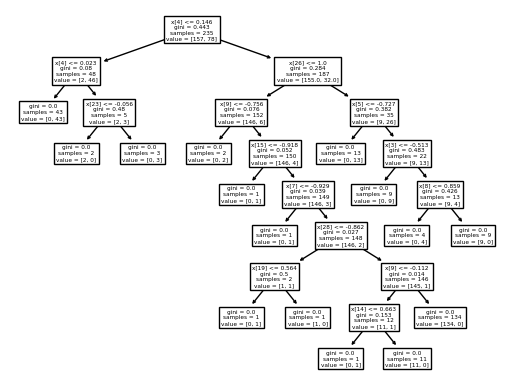

In [ ]:
tree_cf = tree.DecisionTreeClassifier()
tree_cf.fit(X_trainIono,y_trainIono)
tree.plot_tree(tree_cf)

In [ ]:
# Score
X_testIono = testIono.drop('class', axis=1)
y_testIono = testIono['class']
print(ripper_clf.score(X_testIono, y_testIono))

0.8620689655172413


In [ ]:
print(tree_cf.score(X_testIono, y_testIono))

0.8620689655172413


In [ ]:
X_trainDiabe = trainDiabe.drop('class', axis=1)
y_trainDiabe = trainDiabe['class']
# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(X_trainDiabe, y_trainDiabe)
# Print model
print(ripper_clf.out_model())

[[age=<22.0 ^ mass=<23.53] V
[age=<22.0 ^ mass=26.06-28.09] V
[mass=23.53-26.06 ^ preg=<1.0] V
[plas=<84.0 ^ preg=<1.0] V
[plas=84.0-95.0 ^ preg=<1.0] V
[plas=<84.0] V
[mass=23.53-26.06] V
[skin=18.0-23.0]]
None


[Text(0.6524816176470588, 0.9666666666666667, 'x[1] <= 154.5\ngini = 0.453\nsamples = 514\nvalue = [178, 336]'),
 Text(0.36415441176470587, 0.9, 'x[7] <= 30.5\ngini = 0.381\nsamples = 429\nvalue = [110.0, 319.0]'),
 Text(0.2452205882352941, 0.8333333333333334, 'x[5] <= 45.4\ngini = 0.265\nsamples = 261\nvalue = [41, 220]'),
 Text(0.19044117647058822, 0.7666666666666667, 'x[1] <= 127.5\ngini = 0.242\nsamples = 255\nvalue = [36, 219]'),
 Text(0.1161764705882353, 0.7, 'x[0] <= 6.5\ngini = 0.174\nsamples = 208\nvalue = [20, 188]'),
 Text(0.07352941176470588, 0.6333333333333333, 'x[5] <= 30.95\ngini = 0.145\nsamples = 203\nvalue = [16, 187]'),
 Text(0.023529411764705882, 0.5666666666666667, 'x[6] <= 0.672\ngini = 0.017\nsamples = 114\nvalue = [1, 113]'),
 Text(0.011764705882352941, 0.5, 'gini = 0.0\nsamples = 98\nvalue = [0, 98]'),
 Text(0.03529411764705882, 0.5, 'x[5] <= 24.0\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.023529411764705882, 0.43333333333333335, 'gini = 0.0\nsampl

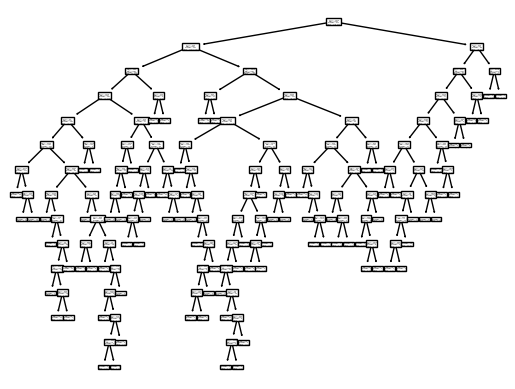

In [ ]:
tree_cf = tree.DecisionTreeClassifier()
tree_cf.fit(X_trainDiabe,y_trainDiabe)
tree.plot_tree(tree_cf)

In [ ]:
# Score
X_testDiabe = testDiabe.drop('class', axis=1)
y_testDiabe = testDiabe['class']
print(ripper_clf.score(X_testDiabe, y_testDiabe))

0.5984251968503937


In [ ]:
print(tree_cf.score(X_testDiabe, y_testDiabe))

0.6496062992125984


In [ ]:
X_trainVehicle = trainVehicle.drop('Class', axis=1)
y_trainVehicle = trainVehicle['Class']
# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(X_trainVehicle, y_trainVehicle)
# Print model
print(ripper_clf.out_model())

[[Elongatedness=<31.0] V
[Praxis_rectangular=20.0-22.0] V
[Praxis_rectangular=22.0-24.0] V
[Praxis_rectangular=18.0-19.0 ^ Max_length_aspect_ratio=6.0-7.0] V
[Compactness=<84.0 ^ Max_length_aspect_ratio=<6.0] V
[Major_variance=179.0-191.0] V
[Max_length_aspect_ratio=<6.0 ^ Praxis_rectangular=18.0-19.0] V
[Max_length_aspect_ratio=7.0-8.0 ^ Praxis_rectangular=18.0-19.0] V
[Length_rectangular=<129.0 ^ Scatter_ratio=131.0-142.0] V
[Major_variance=191.0-208.0] V
[Max_length_aspect_ratio=6.0-7.0 ^ Praxis_aspect_ratio=54.0-56.0] V
[Hollows_ratio=202.0-205.0 ^ Circularity=37.0-39.0]]
None


[Text(0.6113505747126436, 0.9583333333333334, 'x[7] <= 41.5\ngini = 0.36\nsamples = 566\nvalue = [133, 433]'),
 Text(0.5653735632183908, 0.875, 'gini = 0.0\nsamples = 258\nvalue = [0, 258]'),
 Text(0.6573275862068966, 0.875, 'x[5] <= 8.5\ngini = 0.491\nsamples = 308\nvalue = [133.0, 175.0]'),
 Text(0.4525862068965517, 0.7916666666666666, 'x[6] <= 143.5\ngini = 0.39\nsamples = 230\nvalue = [61.0, 169.0]'),
 Text(0.27298850574712646, 0.7083333333333334, 'x[9] <= 127.5\ngini = 0.496\nsamples = 110\nvalue = [60.0, 50.0]'),
 Text(0.13793103448275862, 0.625, 'x[6] <= 122.5\ngini = 0.327\nsamples = 34\nvalue = [7, 27]'),
 Text(0.09195402298850575, 0.5416666666666666, 'x[10] <= 135.5\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.04597701149425287, 0.4583333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.13793103448275862, 0.4583333333333333, 'x[0] <= 88.0\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.09195402298850575, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [6, 

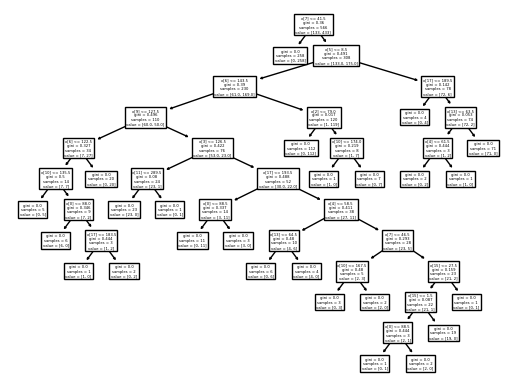

In [ ]:
tree_cf = tree.DecisionTreeClassifier()
tree_cf.fit(X_trainVehicle,y_trainVehicle)
tree.plot_tree(tree_cf)

In [ ]:
# Score
X_testVehicle = testVehicle.drop('Class', axis=1)
y_testVehicle = testVehicle['Class']
print(ripper_clf.score(X_testVehicle, y_testVehicle))

0.9285714285714286


In [ ]:
print(tree_cf.score(X_testVehicle, y_testVehicle))

0.9178571428571428


In [ ]:
X_trainVowel = trainVowel.drop('Class', axis=1)
y_trainVowel = trainVowel['Class']
# Create and train model
ripper_clf = lw.RIPPER()
ripper_clf.fit(X_trainVowel, y_trainVowel)
# Print model
print(ripper_clf.out_model())

[[F5=-0.1-0.1] V
[F3=0.004-0.21] V
[F3=-0.21-0.004] V
[F3=<-0.44] V
[F3=-0.44--0.21] V
[F1=1.56-1.87] V
[F3=0.21-0.38] V
[F3=0.38-0.62 ^ TT=1.0] V
[F4=<-1.15] V
[F1=0.36-0.86] V
[F1=1.27-1.56] V
[F1=0.86-1.27 ^ Sex=0.0] V
[F1=1.87-2.19] V
[F1=0.86-1.27 ^ TT=0.0] V
[F1=2.54-2.94] V
[F1=2.19-2.54]]
None


[Text(0.4861111111111111, 0.9375, 'x[4] <= 0.251\ngini = 0.155\nsamples = 661\nvalue = [56, 605]'),
 Text(0.2222222222222222, 0.8125, 'x[11] <= -0.1\ngini = 0.42\nsamples = 60\nvalue = [42, 18]'),
 Text(0.1111111111111111, 0.6875, 'x[8] <= 0.519\ngini = 0.169\nsamples = 43\nvalue = [39, 4]'),
 Text(0.05555555555555555, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16666666666666666, 0.5625, 'x[6] <= 0.898\ngini = 0.133\nsamples = 42\nvalue = [39, 3]'),
 Text(0.1111111111111111, 0.4375, 'x[9] <= 0.351\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.05555555555555555, 0.3125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.16666666666666666, 0.3125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.2222222222222222, 0.4375, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.3333333333333333, 0.6875, 'x[10] <= 1.199\ngini = 0.291\nsamples = 17\nvalue = [3, 14]'),
 Text(0.2777777777777778, 0.5625, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.3888888888

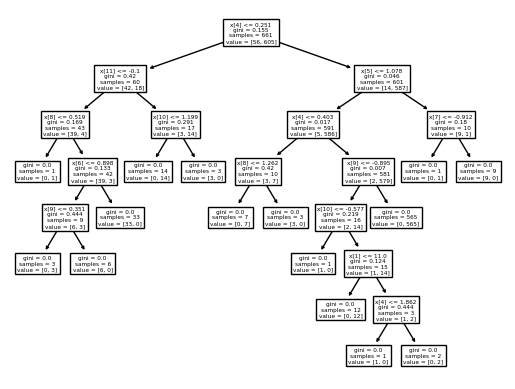

In [ ]:
tree_cf = tree.DecisionTreeClassifier()
tree_cf.fit(X_trainVowel,y_trainVowel)
tree.plot_tree(tree_cf)

In [ ]:
# Score
X_testVowel = testVowel.drop('Class', axis=1)
y_testVowel = testVowel['Class']
print(ripper_clf.score(X_testVowel, y_testVowel))

0.9296636085626911


In [ ]:
print(tree_cf.score(X_testVowel, y_testVowel))

0.9755351681957186


# Decision trees vs SVM

In [20]:
X_trainTae = trainTae.drop('Class_attribute', axis=1)
y_trainTae = trainTae['Class_attribute']

X_testTae = testTae.drop('Class_attribute', axis=1)
y_testTae = testTae['Class_attribute']

In [21]:
X_trainSonar = trainSonar.drop('Class', axis=1)
y_trainSonar = trainSonar['Class']

X_testSonar = testSonar.drop('Class', axis=1)
y_testSonar = testSonar['Class']

In [22]:
X_trainSpambase = trainSpambase.drop('class', axis=1)
y_trainSpambase = trainSpambase['class']

X_testSpambase = testSpambase.drop('class', axis=1)
y_testSpambase = testSpambase['class']

In [23]:
X_trainPage = trainPage.drop('Class', axis=1)
y_trainPage = trainPage['Class']

X_testPage = testPage.drop('Class', axis=1)
y_testPage = testPage['Class']

In [24]:
X_trainIris = trainIris.drop('class', axis=1)
y_trainIris = trainIris['class']

X_testIris = testIris.drop('class', axis=1)
y_testIris = testIris['class']

In [25]:
X_trainLetter = trainLetter.drop('class', axis=1)
y_trainLetter = trainLetter['class']

X_testLetter = testLetter.drop('class', axis=1)
y_testLetter = testLetter['class']

In [26]:
clf_svm = svm.SVC(kernel='linear', C=1)
clf_tree = tree.DecisionTreeClassifier()
SVM_scores = []
Tree_scores = []
datasets = []

In [ ]:
init = time.time()
clf_svm.fit(X_trainIono, y_trainIono)
end = time.time()
print(clf_svm.score(X_testIono, y_testIono))
SVM_scores.append(clf_svm.score(X_testIono, y_testIono) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Ionosphere")

0.8275862068965517
Tiempo para ejecutarse: 0.009331941604614258s


In [ ]:
init = time.time()
clf_tree.fit(X_trainIono, y_trainIono)
end = time.time()
print(clf_tree.score(X_testIono, y_testIono))
print(f"Tiempo para ejecutarse: {end-init}s")
Tree_scores.append(clf_tree.score(X_testIono, y_testIono) * 100)

0.8879310344827587
Tiempo para ejecutarse: 0.019437789916992188s


In [ ]:
init = time.time()
clf_svm.fit(X_trainDiabe, y_trainDiabe)
end = time.time()
print(clf_svm.score(X_testDiabe, y_testDiabe))
SVM_scores.append(clf_svm.score(X_testDiabe, y_testDiabe) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Diabetes")

0.7795275590551181
Tiempo para ejecutarse: 4.3001062870025635s


In [ ]:
init = time.time()
clf_tree.fit(X_trainDiabe, y_trainDiabe)
end = time.time()
print(clf_tree.score(X_testDiabe, y_testDiabe))
Tree_scores.append(clf_tree.score(X_testDiabe, y_testDiabe) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.6692913385826772
Tiempo para ejecutarse: 0.007848262786865234s


In [ ]:
init = time.time()
clf_svm.fit(X_trainVowel, y_trainVowel)
end = time.time()
print(clf_svm.score(X_testVowel, y_testVowel))
SVM_scores.append(clf_svm.score(X_testVowel, y_testVowel) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Vowel")

0.9755351681957186
Tiempo para ejecutarse: 0.012729167938232422s


In [ ]:
init = time.time()
clf_tree.fit(X_trainVowel, y_trainVowel)
end = time.time()
print(clf_tree.score(X_testVowel, y_testVowel))
Tree_scores.append(clf_tree.score(X_testVowel, y_testVowel) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.9877675840978594
Tiempo para ejecutarse: 0.008518695831298828s


In [ ]:
init = time.time()
clf_svm.fit(X_trainVehicle, y_trainVehicle)
end = time.time()
print(clf_svm.score(X_testVehicle, y_testVehicle))
SVM_scores.append(clf_svm.score(X_testVehicle, y_testVehicle) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Vehicle")

0.9678571428571429
Tiempo para ejecutarse: 0.055171966552734375s


In [ ]:
init = time.time()
clf_tree.fit(X_trainVehicle, y_trainVehicle)
end = time.time()
print(clf_tree.score(X_testVehicle, y_testVehicle))
Tree_scores.append(clf_tree.score(X_testVehicle, y_testVehicle) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.9285714285714286
Tiempo para ejecutarse: 0.006644010543823242s


In [ ]:
init = time.time()
clf_svm.fit(X_trainTae, y_trainTae)
end = time.time()
print(clf_svm.score(X_testTae, y_testTae))
SVM_scores.append(clf_svm.score(X_testTae, y_testTae) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Tae")

0.44
Tiempo para ejecutarse: 0.01990962028503418s


In [ ]:
init = time.time()
clf_tree.fit(X_trainTae, y_trainTae)
end = time.time()
print(clf_tree.score(X_testTae, y_testTae))
Tree_scores.append(clf_tree.score(X_testTae, y_testTae) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.64
Tiempo para ejecutarse: 0.005415916442871094s


In [ ]:
init = time.time()
clf_svm.fit(X_trainSonar, y_trainSonar)
end = time.time()
print(clf_svm.score(X_testSonar, y_testSonar))
SVM_scores.append(clf_svm.score(X_testSonar, y_testSonar) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Sonar")

0.7681159420289855
Tiempo para ejecutarse: 0.008473873138427734s


In [ ]:
init = time.time()
clf_tree.fit(X_trainSonar, y_trainSonar)
end = time.time()
print(clf_tree.score(X_testSonar, y_testSonar))
Tree_scores.append(clf_tree.score(X_testSonar, y_testSonar) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.7391304347826086
Tiempo para ejecutarse: 0.017082929611206055s


In [ ]:
init = time.time()
clf_svm.fit(X_trainSpambase, y_trainSpambase)
end = time.time()
print(clf_svm.score(X_testSpambase, y_testSpambase))
SVM_scores.append(clf_svm.score(X_testSpambase, y_testSpambase) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Spambase")

0.9354838709677419
Tiempo para ejecutarse: 318.12422132492065s


In [ ]:
init = time.time()
clf_tree.fit(X_trainSpambase, y_trainSpambase)
end = time.time()
print(clf_tree.score(X_testSpambase, y_testSpambase))
Tree_scores.append(clf_tree.score(X_testSpambase, y_testSpambase) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.9091507570770243
Tiempo para ejecutarse: 0.0631875991821289s


In [ ]:
init = time.time()
clf_svm.fit(X_trainPage, y_trainPage)
end = time.time()
print(clf_svm.score(X_testPage, y_testPage))
SVM_scores.append(clf_svm.score(X_testPage, y_testPage) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Page")

0.9496124031007752
Tiempo para ejecutarse: 517.7369780540466s


In [ ]:
init = time.time()
clf_tree.fit(X_trainPage, y_trainPage)
end = time.time()
print(clf_tree.score(X_testPage, y_testPage))
Tree_scores.append(clf_tree.score(X_testPage, y_testPage) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.9678848283499446
Tiempo para ejecutarse: 0.035588979721069336s


In [ ]:
init = time.time()
clf_svm.fit(X_trainIris, y_trainIris)
end = time.time()
print(clf_svm.score(X_testIris, y_testIris))
SVM_scores.append(clf_svm.score(X_testIris, y_testIris) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Iris")

0.96
Tiempo para ejecutarse: 0.004065036773681641s


In [ ]:
init = time.time()
clf_tree.fit(X_trainIris, y_trainIris)
end = time.time()
print(clf_tree.score(X_testIris, y_testIris))
Tree_scores.append(clf_tree.score(X_testIris, y_testIris) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.9
Tiempo para ejecutarse: 0.003732919692993164s


In [ ]:
init = time.time()
clf_svm.fit(X_trainLetter, y_trainLetter)
end = time.time()
print(clf_svm.score(X_testLetter, y_testLetter))
SVM_scores.append(clf_svm.score(X_testLetter, y_testLetter) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")
datasets.append("Letter")

0.8516666666666667
Tiempo para ejecutarse: 3.5773513317108154s


In [ ]:
init = time.time()
clf_tree.fit(X_trainLetter, y_trainLetter)
end = time.time()
print(clf_tree.score(X_testLetter, y_testLetter))
Tree_scores.append(clf_tree.score(X_testLetter, y_testLetter) * 100)
print(f"Tiempo para ejecutarse: {end-init}s")

0.8639393939393939
Tiempo para ejecutarse: 0.08236813545227051s


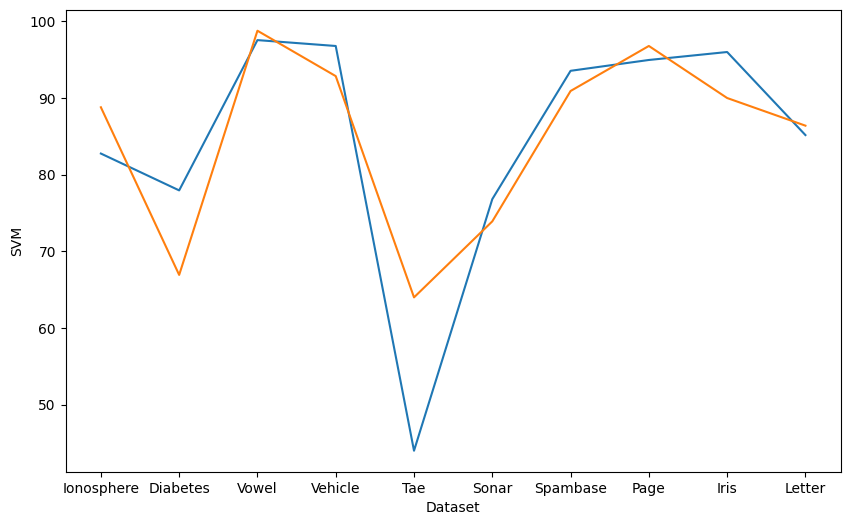

In [ ]:
my_dict = dict(SVM=SVM_scores,Tree=Tree_scores,Dataset=datasets)
data = pd.DataFrame (my_dict)
fig, ax = plt.subplots(figsize=(10, 6))
ax= sns.lineplot(x='Dataset', y='SVM', data=data)
ax1 = sns.lineplot(x='Dataset', y='Tree', data=data)

## Crossvalidation

In [16]:
# Set the parameters by cross-validation
parameters = [
 {"kernel": ["rbf"], "gamma": [0.01, 0.1, 1.0], "C": [1, 10, 100, 1000]},
 {"kernel": ["linear"], "gamma": [0.01], "C": [1, 10, 100, 1000]},
]

In [17]:
from sklearn_evaluation.util import _mapping_to_tuple_pairs, _get_params_value, _sorted_map_iter, _flatten_list, \
    _group_by
import collections

import matplotlib.pyplot as plt
import numpy as np
from six import string_types

from sklearn_evaluation.plot.matplotlib.bar import BarShifter


def grid_searchSingle(cv_results_,
                change,
                subset=None,
                kind='line',
                ax=None,
                sort=True
                ):

    if change is None:
        raise ValueError(('change can\'t be None, you need to select at least'
                          ' one value to make the plot.'))

    if ax is None:
        ax = plt.gca()

    gs = collections.namedtuple(
        'grid_scores_',
        ['parameters', 'mean_validation_score', 'std_test_score'])

    grid_scores = [
        gs(p, m, s) for p, m, s in
        zip(cv_results_['params'], cv_results_['mean_test_score'],
            cv_results_['std_test_score'])
    ]

    if isinstance(change, string_types) or len(change) == 1:
        return _grid_search_singleP(grid_scores, change, subset, kind, ax, sort)
    else:
        raise ValueError('change must have length 1 or 2 or be a string')


def _grid_search_singleP(grid_scores, change, subset, kind, ax, sort):
    # the logic of this function is to group the grid scores acording
    # to certain rules and subsequently remove the elements that we are
    # not interested in, until we have only the elements that the user
    # wants to plot

    # get a set with all the parameters
    params = set(grid_scores[0].parameters.keys())

    # remove parameter to vary from the list
    # since we are not filtering on that parameter
    try:
        params.remove(change)
    except KeyError:
        raise ValueError('{} is not a valid parameter'.format(change))

    # now need need to filter out the grid_scores that the user
    # didn't select, for that we have to cases, the first one is when
    # the user explicitely selected some values
    if subset:
        # group the grid_scores based on the values the user selected
        # in subset
        groups = _group_by(grid_scores, _get_params_value(subset.keys()))
        keys = _mapping_to_tuple_pairs(subset)
        groups = {k: v for k, v in _sorted_map_iter(groups, sort) if k in keys}
        grid_scores = _flatten_list(groups.values())
        groups = _group_by(grid_scores, _get_params_value(params))
        if not groups:
            raise ValueError(('Your subset didn\'t match any data'
                              ' verify that the values are correct.'))
    # if the user didn't select any values don't filter anything
    # just group the grid_scores depending on the values they
    # have for the parameters
    else:
        groups = _group_by(grid_scores, _get_params_value(params))

    if kind == 'bar':
        change_unique = len(set([g.parameters[change] for g in grid_scores]))
        # bar shifter is just a wrapper around matplotlib's bar plot
        # to automatically calculate the left position on each bar
        bar_shifter = BarShifter(g_number=change_unique,
                                 g_size=len(groups),
                                 ax=ax)

    for params_kv, group in _sorted_map_iter(groups, sort):
        # get the x and y values for each grid_score on this group
        # also calculate the std
        x = [element.parameters[change] for element in group]
        y = [element.mean_validation_score for element in group]
        stds = [element.std_test_score for element in group]

        # take (param, value) and convert them to 'param: value'
        label = ['{}: {}'.format(*t) for t in params_kv]
        # now convert it to one string
        label = ', '.join(label)

        if kind == 'bar':
            bar_shifter(y, yerr=stds, label=label)
        elif kind == 'line':
            is_categorical = isinstance(x[0], string_types)
            if is_categorical:
                ints = range(len(x))
                ax.errorbar(ints, y, yerr=stds, label=label)
                ax.set_xticks(ints)
            else:
                ax.errorbar(x, y, yerr=stds, label=label)
                ax.set_xticks(x)

    ax.set_xticklabels(x)
    ax.set_title('Grid search results')
    ax.set_ylabel('Score')
    ax.set_xscale('log')
    ax.set_xlabel(change)
    ax.margins(0.05)
    return ax

In [18]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

# Train the SVM model
svm_model = svm.SVC()
optimal = GridSearchCV(estimator=svm_model, cv=sss, param_grid=parameters, n_jobs=-1)

In [ ]:
init = time.time()
optimal.fit(X_trainIono, y_trainIono)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testIono, y_testIono)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score -> 0.9593220338983052

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.9051724137931034

Tiempo medio en ejecutarse el método: 0.00874822735786438 +- 0.0026494101088745227s
Tiempo en ejecutarse la búsqueda 2.521439552307129s, (0.04202399253845215 min)


<Axes: >

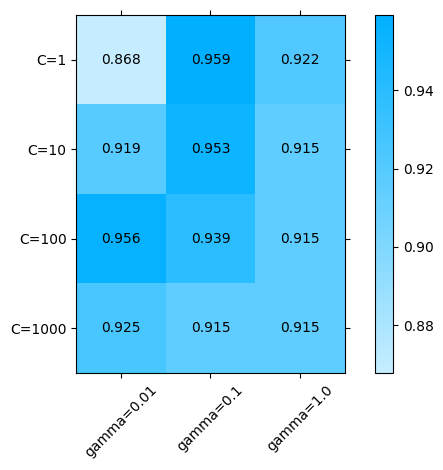

In [ ]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<Axes: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

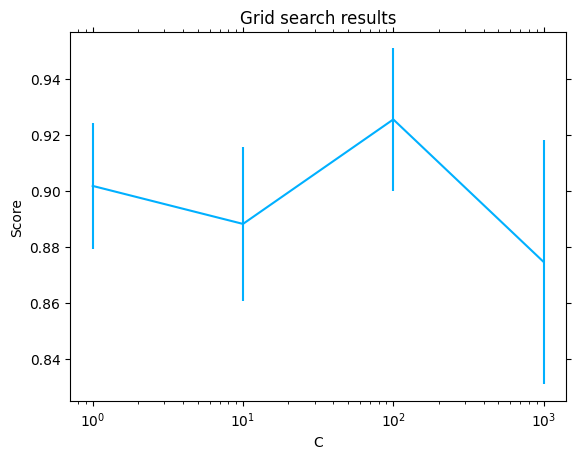

In [ ]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [ ]:
init = time.time()
optimal.fit(X_trainDiabe, y_trainDiabe)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testDiabe, y_testDiabe)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Best score -> 0.7534883720930232

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.7795275590551181

Tiempo medio en ejecutarse el método: 19.118024665117265 +- 8.158502428317917s
Tiempo en ejecutarse la búsqueda 782.566371679306s, (13.042772861321767 min)


<Axes: >

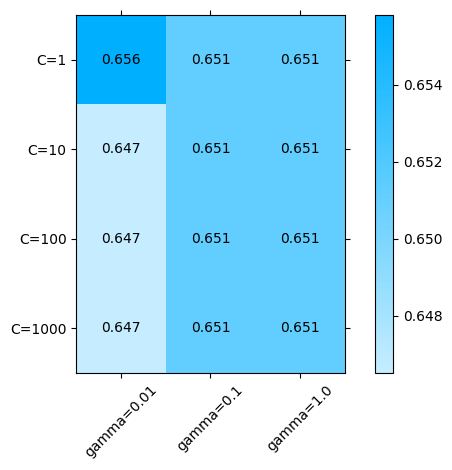

In [ ]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<Axes: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

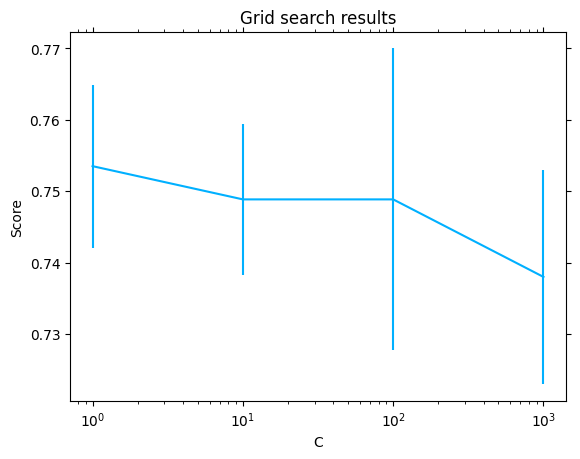

In [ ]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [ ]:
init = time.time()
optimal.fit(X_trainVehicle, y_trainVehicle)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testVehicle, y_testVehicle)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Best score -> 0.956338028169014

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.9678571428571429

Tiempo medio en ejecutarse el método: 1.557580056786537 +- 1.8094120211304612s
Tiempo en ejecutarse la búsqueda 76.73888540267944s, (1.2789814233779908 min)


<Axes: >

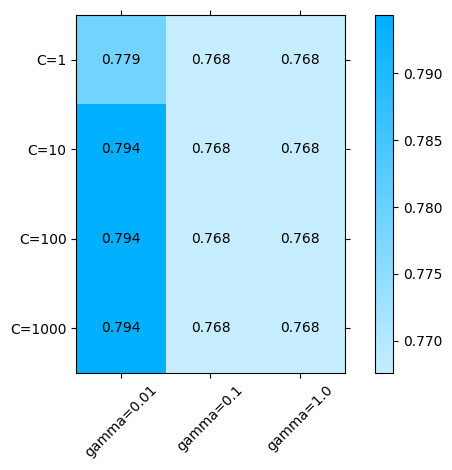

In [ ]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<Axes: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

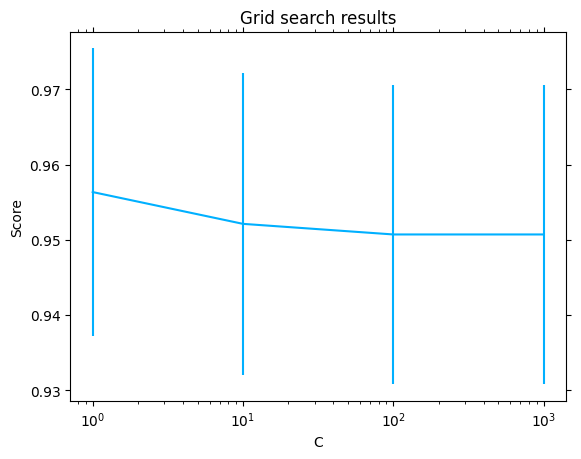

In [ ]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [ ]:
init = time.time()
optimal.fit(X_trainVowel, y_trainVowel)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testVowel, y_testVowel)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best score -> 0.9987951807228915

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.9969418960244648

Tiempo medio en ejecutarse el método: 0.03049539029598236 +- 0.009408871007315644s
Tiempo en ejecutarse la búsqueda 1.591399908065796s, (0.0265233318010966 min)


<Axes: >

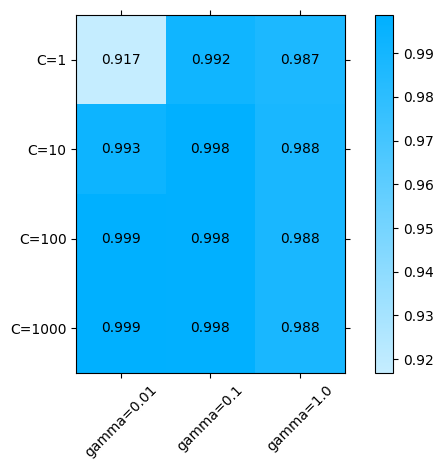

In [ ]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<Axes: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

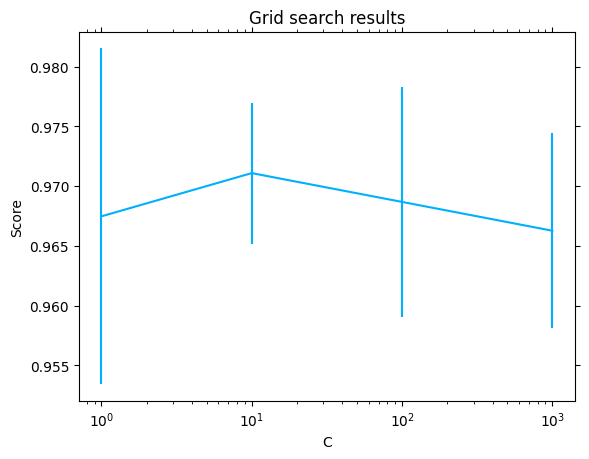

In [ ]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [ ]:
init = time.time()
optimal.fit(X_trainTae, y_trainTae)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testTae, y_testTae)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Best score -> 0.6

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.42

Tiempo medio en ejecutarse el método: 0.4660159647464752 +- 0.23122913290724065s
Tiempo en ejecutarse la búsqueda 20.89908218383789s, (0.3483180363972982 min)


<Axes: >

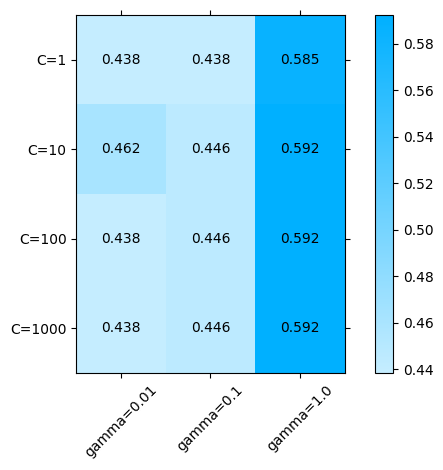

In [ ]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<Axes: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

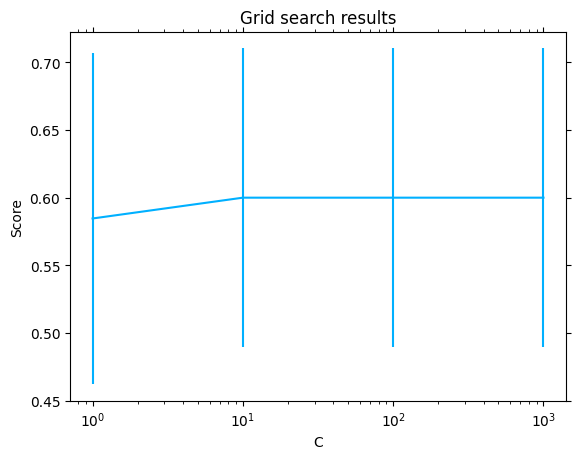

In [ ]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [ ]:
init = time.time()
optimal.fit(X_trainSonar, y_trainSonar)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testSonar, y_testSonar)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 10, 'gamma': 1.0, 'kernel': 'rbf'}
Best score -> 0.8571428571428571

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.8840579710144928

Tiempo medio en ejecutarse el método: 0.006779885292053223 +- 0.0008475202833026472s
Tiempo en ejecutarse la búsqueda 0.5476894378662109s, (0.009128157297770183 min)


<Axes: >

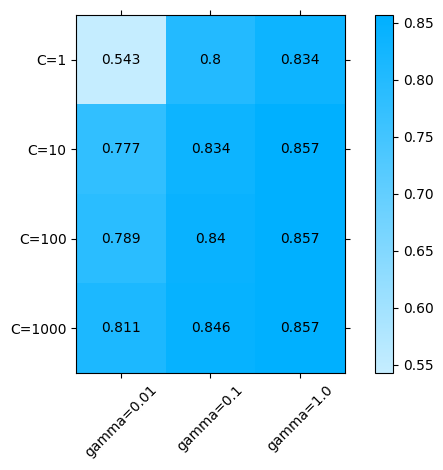

In [ ]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<Axes: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

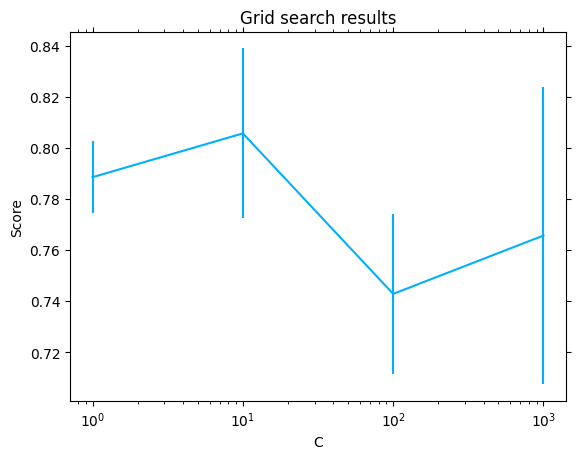

In [ ]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [ ]:
init = time.time()
optimal.fit(X_trainSpambase, y_trainSpambase)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testSpambase, y_testSpambase)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Best score -> 0.9208819714656291

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.9354838709677419

Tiempo medio en ejecutarse el método: 376.7770056217908 +- 120.68648920961145s
Tiempo en ejecutarse la búsqueda 16206.608518600464s, (270.1101419766744 min)


<Axes: >

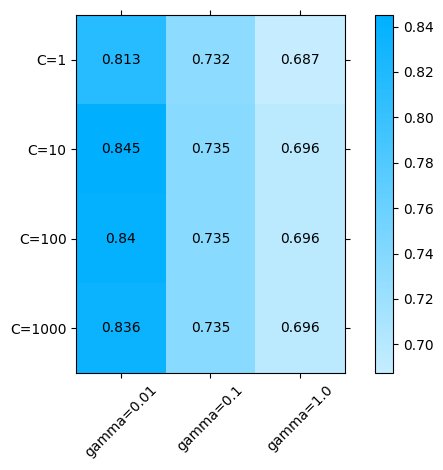

In [ ]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<Axes: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

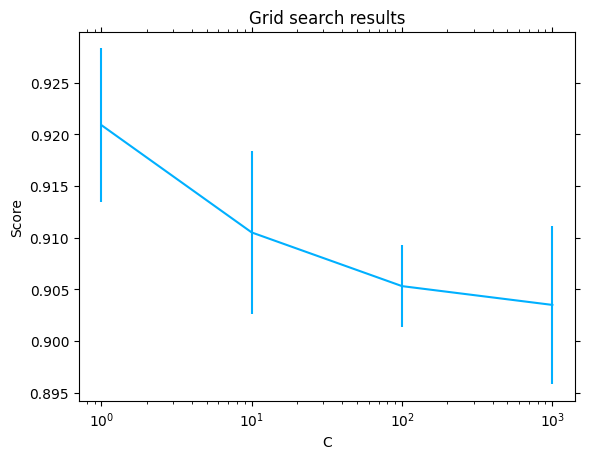

In [ ]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [33]:
init = time.time()
optimal.fit(X_trainPage, y_trainPage)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testPage, y_testPage)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Best score -> 0.95092693565976

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.9485049833887044

Tiempo medio en ejecutarse el método: 221.39819986522198 +- 80.15602071837347s
Tiempo en ejecutarse la búsqueda 9484.27195596695s, (158.07119926611583 min)


<Axes: >

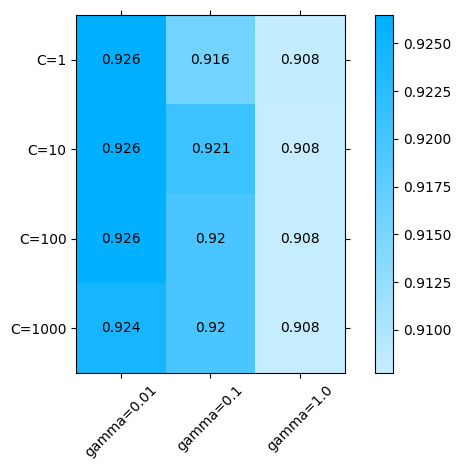

In [34]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<Axes: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

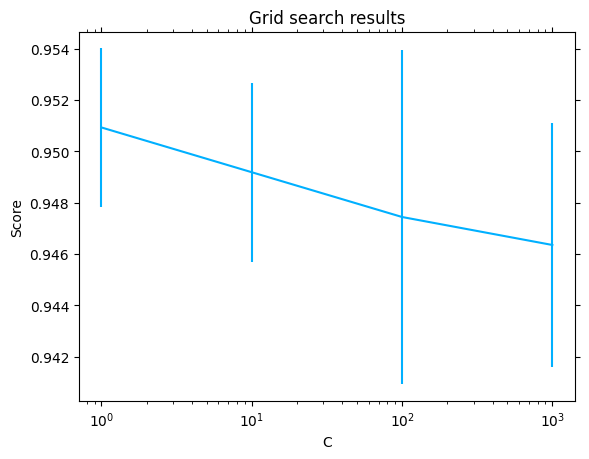

In [35]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [27]:
init = time.time()
optimal.fit(X_trainIris, y_trainIris)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testIris, y_testIris)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best score -> 0.984

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.96

Tiempo medio en ejecutarse el método: 0.00803427994251251 +- 0.002556829278933586s
Tiempo en ejecutarse la búsqueda 3.446136236190796s, (0.057435603936513265 min)


<Axes: >

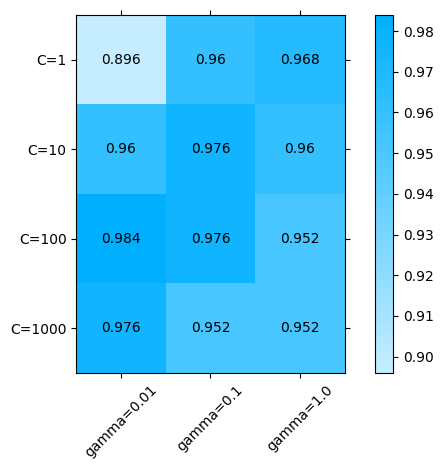

In [28]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<Axes: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

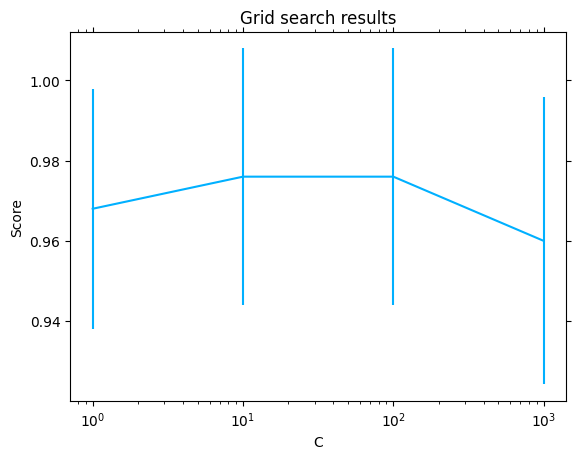

In [29]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')

In [30]:
init = time.time()
optimal.fit(X_trainLetter, y_trainLetter)
end = time.time()
timeSearch = end - init
print(f"La mejor accuracy se obtuvo con el siguiente SVM:")
print(f'Best params -> {optimal.best_params_}')
print(f'Best score -> {optimal.best_score_}')

print(f"\nSi usamos el dataset de test, obtenemos el siguiente resultado:")
print(f"score = {optimal.score(X_testLetter, y_testLetter)}")
print(f"\nTiempo medio en ejecutarse el método: {np.mean(optimal.cv_results_.get('mean_fit_time'))} +- {np.mean(optimal.cv_results_.get('std_fit_time'))}s")
print(f"Tiempo en ejecutarse la búsqueda {timeSearch}s, ({timeSearch/60} min)")

La mejor accuracy se obtuvo con el siguiente SVM:
Best params -> {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score -> 0.9646567164179103

Si usamos el dataset de test, obtenemos el siguiente resultado:
score = 0.968030303030303

Tiempo medio en ejecutarse el método: 89.37507590055466 +- 12.550737903276623s
Tiempo en ejecutarse la búsqueda 4095.3442664146423s, (68.25573777357737 min)


<Axes: >

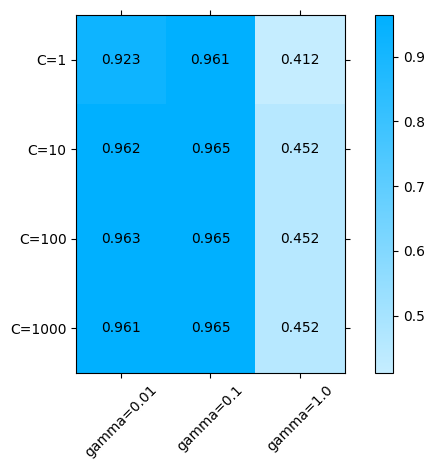

In [31]:
grid_scores = optimal.cv_results_
plot.grid_search(grid_scores, change=('C', 'gamma'),
                 subset={'kernel': 'rbf'})

<Axes: title={'center': 'Grid search results'}, xlabel='C', ylabel='Score'>

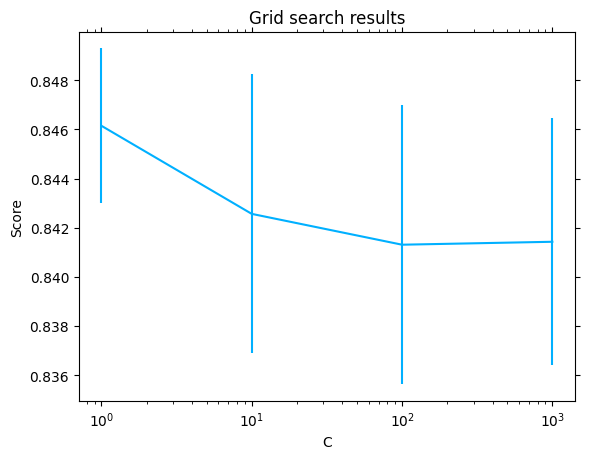

In [32]:
grid_searchSingle(grid_scores, change='C',
                 subset={'kernel': "linear"},
                 kind='line')